# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Change the directory

In [2]:
# import os
# os.chdir("../../../")
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/MyDrive/poleval_emotion/

Mounted at /content/drive/
/content/drive/MyDrive/poleval_emotion


# Determine constants

In [3]:
TRAIN_DIR = 'data/train/'
IN_FILENAME = 'in_gpt_corr.tsv'
EXPECTED_FILENAME = 'expected.tsv'

In [4]:
PLOTS_DIR = 'plots/'
DATA_TYPE =  'gpt_corr/'

# Load data

In [5]:
data = pd.read_csv(TRAIN_DIR + IN_FILENAME, sep='\t')
expected_data = pd.read_csv(TRAIN_DIR + EXPECTED_FILENAME, sep='\t')

# Function to preprocess text

Removing special characters and lowering the case

In [6]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower().strip()

# Apply preprocessing

In [7]:
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Text length distribution

In [8]:
data['text_length'] = data['cleaned_text'].apply(len)

# Word count distribution

In [9]:
data['word_count'] = data['cleaned_text'].apply(lambda x: len(x.split()))

# Most common words

In [10]:
all_words = ' '.join(data['cleaned_text']).split()
common_words = Counter(all_words).most_common(20)

# Plotting text length distribution

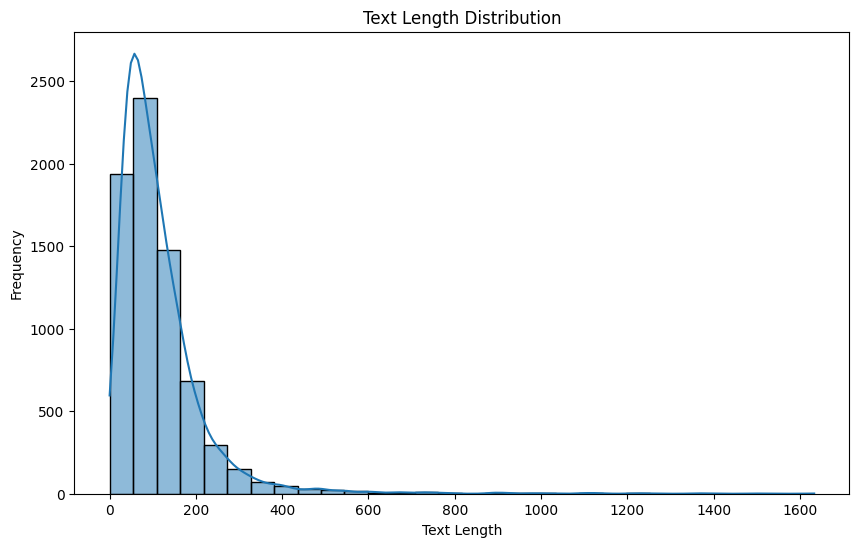

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig(PLOTS_DIR + DATA_TYPE + 'text_length_distribution.png')
plt.show()

# Plotting word count distribution

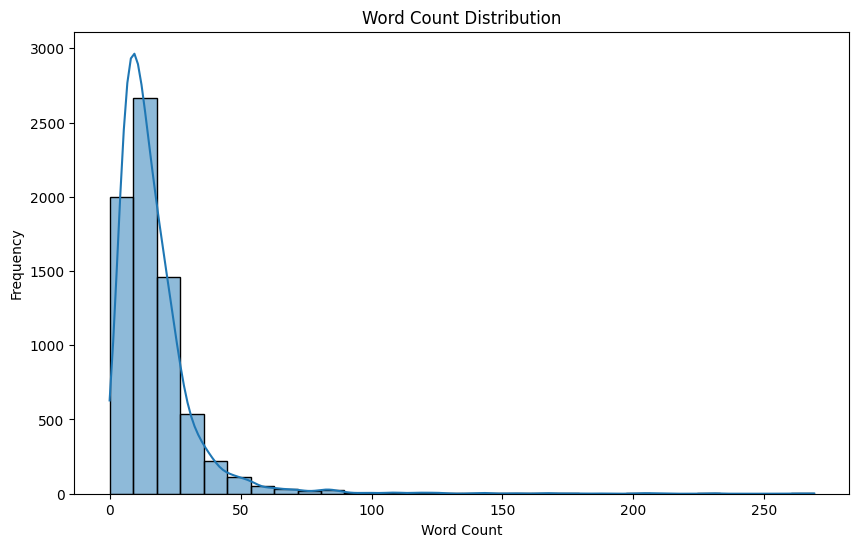

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig(PLOTS_DIR + DATA_TYPE + 'word_count_distribution.png')
plt.show()


# Most common words bar plot

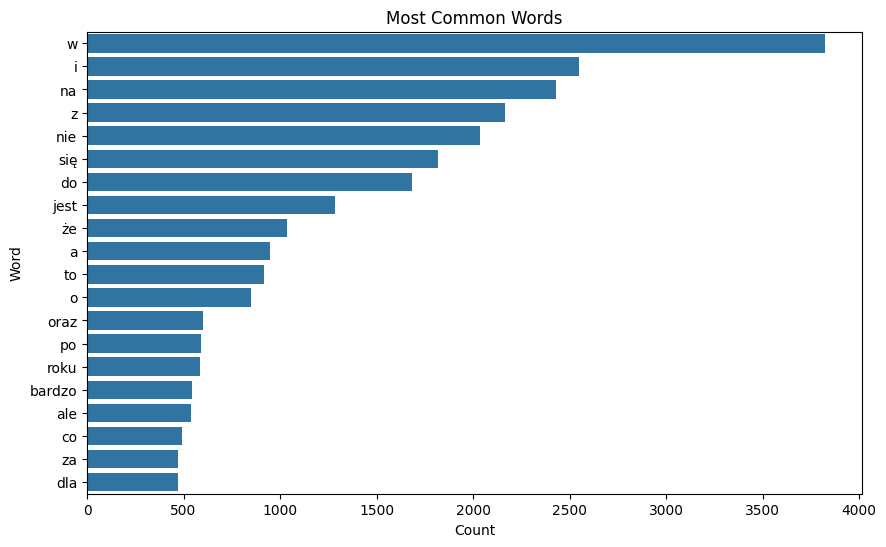

In [13]:
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.savefig(PLOTS_DIR + DATA_TYPE + 'most_common_words.png')
plt.show()

# Displaying the dataframe with added columns for EDA

In [14]:
print(data.head())

                                                text  \
0                                     Dwie gwiazdki.   
1           Ten hotel zasługuje na maksymalnie tyle.   
2   To, że hotel ma 4 gwiazdki w nazwie jest smutne.   
3  Śmiesznie było już podczas rezerwacji, pani z ...   
4  Udało mi się jednak dowiedzieć, że w hotelu są...   

                                        cleaned_text  text_length  word_count  
0                                      dwie gwiazdki           13           2  
1            ten hotel zasługuje na maksymalnie tyle           39           6  
2     to że hotel ma 4 gwiazdki w nazwie jest smutne           46          10  
3  śmiesznie było już podczas rezerwacji pani z r...          110          15  
4  udało mi się jednak dowiedzieć że w hotelu są ...          279          45  


# EDA for expected data

In [15]:
label_columns = expected_data.columns
label_counts = expected_data.sum().sort_values(ascending=False)

# Plotting distribution of each label

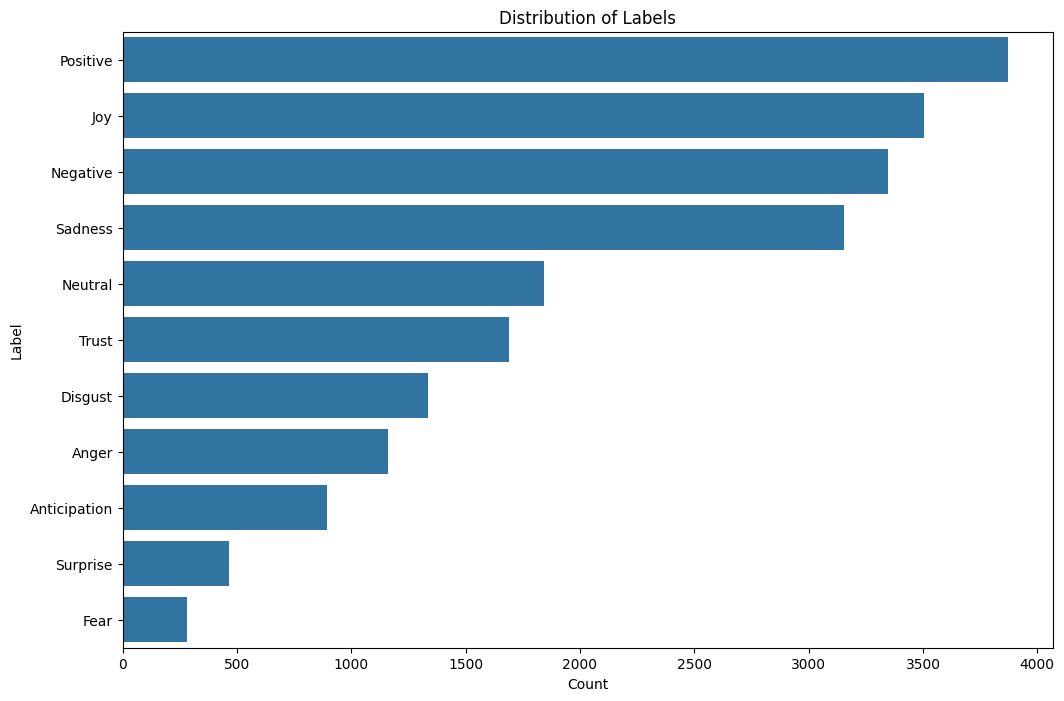

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.values, y=label_counts.index)
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.savefig(PLOTS_DIR + DATA_TYPE + 'distribution_of_labels.png')
plt.show()